In [1]:
from pprint import pprint
import time
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# Unorganized Data

In [2]:
#reading in all covid19 data
time_series_ncov_Confirmed =pd.read_csv('../../../mvp/data/covid19_data/time_series-ncov-Confirmed.csv')
time_series_ncov_Deaths = pd.read_csv('../../../mvp/data/covid19_data/time_series-ncov-Deaths.csv')
time_series_ncov_Recovered =pd.read_csv('../../../mvp/data/covid19_data/time_series-ncov-Recovered.csv')

In [3]:
#Removing Unecessary Columns in each data frame
time_series_ncov_Confirmed =time_series_ncov_Confirmed.drop(columns =['Province/State'])
time_series_ncov_Deaths =time_series_ncov_Deaths.drop(columns =['Province/State'])
time_series_ncov_Recovered =time_series_ncov_Recovered.drop(columns =['Province/State'])
time_series_ncov_Confirmed.head()

,Country/Region,Lat,Long,Date,Value
0,#country+name,#geo+lat,#geo+lon,#date,#affected+infected+value+num
1,Afghanistan,33.0,65.0,2020-03-20,24
2,Afghanistan,33.0,65.0,2020-03-19,22
3,Afghanistan,33.0,65.0,2020-03-18,22
4,Afghanistan,33.0,65.0,2020-03-17,22


In [4]:
#Removing unecessary rows in each data set

time_series_ncov_Confirmed =time_series_ncov_Confirmed.drop([0], axis = 0)
time_series_ncov_Deaths =time_series_ncov_Deaths.drop([0], axis = 0)
time_series_ncov_Recovered =time_series_ncov_Recovered.drop([0], axis = 0)
time_series_ncov_Deaths.head()

,Country/Region,Lat,Long,Date,Value
1,Afghanistan,33.0,65.0,2020-03-20,0
2,Afghanistan,33.0,65.0,2020-03-19,0
3,Afghanistan,33.0,65.0,2020-03-18,0
4,Afghanistan,33.0,65.0,2020-03-17,0
5,Afghanistan,33.0,65.0,2020-03-16,0


In [5]:
time_series_ncov_Confirmed.dtypes

Country/Region    object
Lat               object
Long              object
Date              object
Value             object
dtype: object

In [6]:
# Changing all value columns to numeric for analysis
time_series_ncov_Confirmed["Value"] = pd.to_numeric(time_series_ncov_Confirmed["Value"])
time_series_ncov_Deaths["Value"] = pd.to_numeric(time_series_ncov_Deaths["Value"])
time_series_ncov_Recovered["Value"] = pd.to_numeric(time_series_ncov_Recovered["Value"])


In [7]:
time_series_ncov_Confirmed.dtypes

Country/Region     object
Lat                object
Long               object
Date               object
Value             float64
dtype: object

In [8]:
Dates = time_series_ncov_Confirmed['Date'].unique()
Dates

array(['2020-03-20', '2020-03-19', '2020-03-18', '2020-03-17',
       '2020-03-16', '2020-03-15', '2020-03-14', '2020-03-13',
       '2020-03-12', '2020-03-11', '2020-03-10', '2020-03-09',
       '2020-03-08', '2020-03-07', '2020-03-06', '2020-03-05',
       '2020-03-04', '2020-03-03', '2020-03-02', '2020-03-01',
       '2020-02-29', '2020-02-28', '2020-02-27', '2020-02-26',
       '2020-02-25', '2020-02-24', '2020-02-23', '2020-02-22',
       '2020-02-21', '2020-02-20', '2020-02-19', '2020-02-18',
       '2020-02-17', '2020-02-16', '2020-02-15', '2020-02-14',
       '2020-02-13', '2020-02-12', '2020-02-11', '2020-02-10',
       '2020-02-09', '2020-02-08', '2020-02-07', '2020-02-06',
       '2020-02-05', '2020-02-04', '2020-02-03', '2020-02-02',
       '2020-02-01', '2020-01-31', '2020-01-30', '2020-01-29',
       '2020-01-28', '2020-01-27', '2020-01-26', '2020-01-25',
       '2020-01-24', '2020-01-23', '2020-01-22'], dtype=object)

In [9]:
#Renaming value columns to be easier to analyze

time_series_ncov_Confirmed= time_series_ncov_Confirmed.rename(columns ={'Value':'Confirmed Cases'})
time_series_ncov_Deaths= time_series_ncov_Deaths.rename(columns ={'Value':'Deaths'})
time_series_ncov_Recovered= time_series_ncov_Recovered.rename(columns ={'Value':'Recoveries'})
time_series_ncov_Confirmed.head()

,Country/Region,Lat,Long,Date,Confirmed Cases
1,Afghanistan,33.0,65.0,2020-03-20,24.0
2,Afghanistan,33.0,65.0,2020-03-19,22.0
3,Afghanistan,33.0,65.0,2020-03-18,22.0
4,Afghanistan,33.0,65.0,2020-03-17,22.0
5,Afghanistan,33.0,65.0,2020-03-16,21.0


In [10]:
#time_series_ncov_Deaths= time_series_ncov_Deaths.drop(columns =['Lat','Long'])
#time_series_ncov_Recovered= time_series_ncov_Recovered.drop(columns =['Lat','Long'])


In [11]:
#Grouping all dataframes by country/region and the date to get total values for each data set

time_series_nconv_Confirmed = time_series_ncov_Confirmed.groupby(['Country/Region','Date']).sum()['Confirmed Cases']
time_series_nconv_Deaths = time_series_ncov_Deaths.groupby(['Country/Region','Date']).sum()['Deaths']
time_series_nconv_Recovered = time_series_ncov_Recovered.groupby(['Country/Region','Date']).sum()['Recoveries']

confirmed_all = pd.DataFrame({
    "Confirmed Cases": time_series_nconv_Confirmed,
    "Deaths": time_series_nconv_Deaths,
    "Recoveries": time_series_nconv_Recovered
})
confirmed_all.head()


Confirmed Cases  Deaths  Recoveries
Country/Region Date                                           
Afghanistan    2020-01-22              0.0     0.0         0.0
               2020-01-23              0.0     0.0         0.0
               2020-01-24              0.0     0.0         0.0
               2020-01-25              0.0     0.0         0.0
               2020-01-26              0.0     0.0         0.0

In [14]:
confirmed_all.loc[["Italy"]]["Confirmed Cases"].head()

Country/Region  Date      
Italy           2020-01-22    0.0
                2020-01-23    0.0
                2020-01-24    0.0
                2020-01-25    0.0
                2020-01-26    0.0
Name: Confirmed Cases, dtype: float64

In [16]:
# Data
confirmed_all.reset_index(inplace=True)
df=pd.DataFrame({
    'x': pd.Series(Dates),
    'y1': confirmed_all.loc[confirmed_all['Country/Region'] == 'Italy']['Confirmed Cases'], 
    'y2': confirmed_all.loc[confirmed_all['Country/Region'] == 'US']['Confirmed Cases'],
    'y3': confirmed_all.loc[confirmed_all['Country/Region'] == 'China']['Confirmed Cases']
})
df
#df=pd.confirmed_all({'x': range(1,11), 'y1': confirmed_all.loc, 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21) })

#plt.plot('x','y1', data = df, markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
#plt.plot('x','y2',data = df, markerfacecolor='red', markersize=12, color='red', linewidth=4)
#plt.plot('x','y3',data = df, markerfacecolor='orange', markersize=12, color='orange', linewidth=4)

# # multiple line plot
# plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
# plt.legend()


,x,y1,y2,y3
0,2020-03-20,NaN,NaN,NaN
1,2020-03-19,NaN,NaN,NaN
2,2020-03-18,NaN,NaN,NaN
3,2020-03-17,NaN,NaN,NaN
4,2020-03-16,NaN,NaN,NaN
...,...,...,...,...
9730,NaN,NaN,4632.0,NaN
9731,NaN,NaN,6421.0,NaN
9732,NaN,NaN,7783.0,NaN
9733,NaN,NaN,13677.0,NaN


<Figure size 432x288 with 0 Axes>

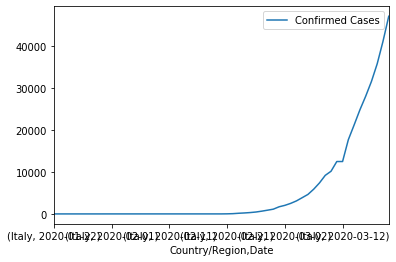

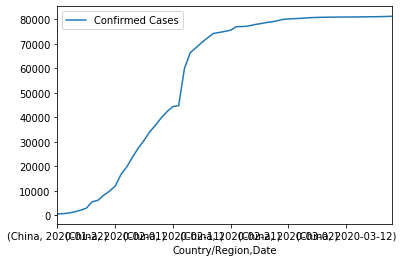

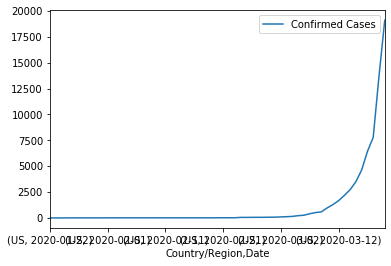

In [14]:
plt.figure()
confirmed_all.loc[['Italy']].plot( y='Confirmed Cases', use_index = True)
confirmed_all.loc[['China']].plot( y='Confirmed Cases', use_index = True)
confirmed_all.loc[['US']].plot( y='Confirmed Cases', use_index = True)
plt.show()
# three_countries_df.plot.line(y = confirmed_all.loc['Italy']"Confirmed Cases", legend = True) 
# plt.gca().invert_xaxis()
# plt.xlabel("Date")
# plt.ylabel("Confirmed Cases")
# plt.title("Confirmed Cases By Date")
# plt.show()

In [33]:
italy.head()

,Confirmed Cases,Deaths,Recoveries
Date,,,
2020-01-22,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0


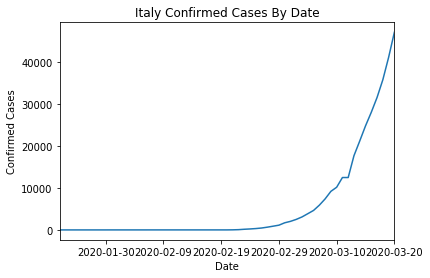

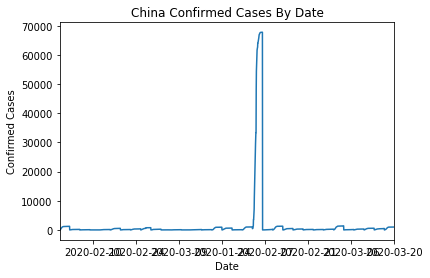

In [11]:
#This cell is to group and chart Italian confirmed cases
italy = time_series_ncov_Confirmed.loc[time_series_ncov_Confirmed['Country/Region']=="Italy",:]
italy_confirm_value = italy["Confirmed Cases"]
italy_date = italy["Date"]

italy_df = pd.DataFrame({
    "Date": italy_date,
    "Confirmed Cases": italy_confirm_value
})

italy_df.plot.line(x = "Date",y = "Confirmed Cases",legend = False)
plt.gca().invert_xaxis()
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Italy Confirmed Cases By Date")
plt.show()


china = time_series_ncov_Confirmed.loc[time_series_ncov_Confirmed['Country/Region']=="China",:]
china_confirm_value = china["Confirmed Cases"]
china_date = china["Date"]

china_df = pd.DataFrame({
    "Date": china_date,
    "Confirmed Cases": china_confirm_value
})

china_df.plot.line(x = "Date",y = "Confirmed Cases",legend = False)
plt.gca().invert_xaxis()
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("China Confirmed Cases By Date")
plt.show()

In [ ]:
italy = time_series_ncov_Deaths.loc[time_series_ncov_Deaths['Country/Region']=="Italy",:]
italy_death_value = italy["Deaths"]
italy_date = italy["Date"]

italy_df = pd.DataFrame({
    "Date": italy_date,
    "Deaths": italy_death_value
})

italy_df.plot.line(x = "Date",y = "Deaths",legend = False)
plt.gca().invert_xaxis()
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.title("Italy Death Cases By Date")
plt.show()

In [ ]:
italy = time_series_ncov_Recovered.loc[time_series_ncov_Recovered['Country/Region']=="Italy",:]
italy_recover_value = italy["Recoveries"]
italy_date = italy["Date"]

italy_df = pd.DataFrame({
    "Date": italy_date,
    "Recoveries": italy_recover_value
})

italy_df.plot.line(x = "Date",y = "Recoveries",legend = False)
plt.gca().invert_xaxis()
plt.xlabel("Date")
plt.ylabel("Recoveries")
plt.title("Italy Recovery Cases By Date")
plt.show()